In [1]:
import os
import sys
import pickle

import pandas as pd
import numpy as np
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors  # Correct import for colors module

# Get the current working directory
CURRENT_DIR = os.getcwd()

# Set the root directory to the parent of the current directory
ROOT = os.path.abspath(os.path.join(CURRENT_DIR, os.pardir))
sys.path.insert(0, ROOT)

from notebooks.plotting_tools import *
from code_.model_configs import analysis_cfg

In [2]:
RESULTS_PATH = os.path.join(ROOT,'results')

In [3]:
DATASET = 'naturalscenes' # one of ['majajhong', 'naturalscenes']
region = analysis_cfg[DATASET]['regions']
model_name = 'expansion'
features_list = analysis_cfg[DATASET]['analysis']['pca']['features']

In [20]:
# expansion model data

all = []
for features in features_list:
    with open(os.path.join(RESULTS_PATH, 'expansion' + '_' + DATASET + '_' + region + '.pkl'), 'rb') as file:
        tmp = pickle.load(file)
    tmp['model'] = model_name
    all.append(tmp)
df_expansion = pd.concat(all)
df_expansion.score = df_expansion.score.astype(np.float32)

# expansion pca data
all = []
for features in features_list:
    with open(os.path.join(RESULTS_PATH, 'pca' + '_' + DATASET + '_' + region + '.pkl'), 'rb') as file:
        tmp = pickle.load(file)
    all.append(tmp)

    
df_pcs = pd.concat(all)
df_pcs.score = df_pcs.score.astype(np.float32)
df_pcs.pcs = df_pcs.pcs.astype(np.float32)
df_pcs['model'] = 'expansion' + '_' + df_pcs['features'] 
df_pcs['pcs'] = df_pcs['pcs'].apply(lambda x: int(x))
df_pcs['full_model_score'] = df_pcs['features'].apply(lambda x: df_expansion[(df_expansion.features == x)].reset_index(drop=True).score[0])

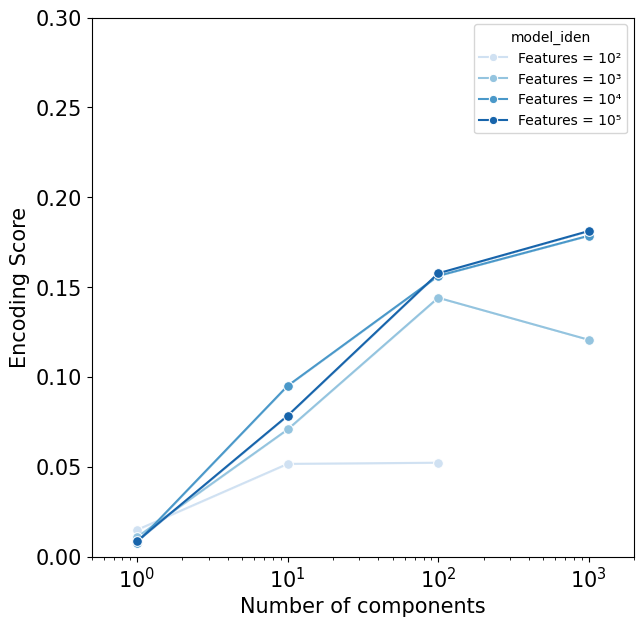

In [22]:
# plot data
rcParams['figure.figsize'] = (7,7)  

names = {}
p = 2
for i in [3,30,300,3000,30000]: 
    names[f'expansion_{i}'] = f'Features = {write_powers(p)}'
    p+=1
df_pcs['model_iden'] = df_pcs['model'].map(names)
palette_blues = {}
blues = plt.cm.Blues([0.2, 0.4, 0.6, 0.8, 1.0])
hex_blues= [mcolors.rgb2hex(color) for color in blues]

for c, hex_color in enumerate(hex_blues):
    palette_blues[f'Features = {write_powers(c+2)}'] = hex_color
df_pcs['color'] = df_pcs['model_iden'].map(palette_blues)


ax1 = sns.lineplot(data = df_pcs, x='pcs', y='score', hue='model_iden', dashes=False, marker='o', palette = palette_blues)
plt.xlabel("Number of components",size=15)
plt.ylabel('Encoding Score',size=15)
plt.xlim(df_pcs['pcs'].min()/2,df_pcs['pcs'].max()*2)
plt.ylim(0,0.6) if region == 'IT' else plt.ylim(0,0.30)
plt.xticks(size=15)
plt.yticks(size=15)
ax1.set_xscale("log")    
plt.setp(plt.gca().get_lines(), markersize=7)  # Change 9 to your desired marker size
plt.savefig(os.path.join(ROOT,f'figures/figure_3_{DATASET}_{region}.png'), dpi=200) 
plt.show()

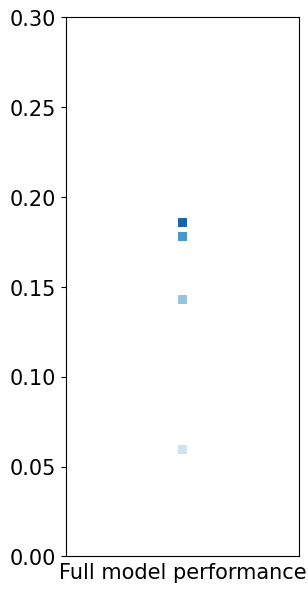

In [23]:
# plot full model results
rcParams['figure.figsize'] = (3,7)  

df_pcs['model_family'] = 'Convolutional'
ax1 = sns.lineplot(data = df_pcs, x='model_family', y='full_model_score', hue='model_iden', 
                   dashes=False, style='model_family', 
                   marker='s', palette = palette_blues)
plt.xlabel("Full model performance",size=15)
plt.ylabel('')
plt.xlim(-10,10)
plt.ylim(0,0.6) if region == 'IT' else plt.ylim(0,0.30)
ax1.legend_.remove()    
plt.yticks(size=15)
ax1.set_xticks([])
plt.setp(plt.gca().get_lines(), markersize=7)  # Change 9 to your desired marker size
plt.savefig(os.path.join(ROOT, f'figures/figure_3_pt_2_{DATASET}_{region}.png'), dpi=200) 
plt.show()